### Import packages and data

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

In [2]:
nfl_df = pd.read_csv('NFL Play by Play 2009-2018 (v5).csv')

/Users/jameshodgens/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Exploratory data analysis

In [3]:
nfl_df.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [4]:
nfl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449371 entries, 0 to 449370
Columns: 255 entries, play_id to defensive_extra_point_conv
dtypes: float64(135), int64(18), object(102)
memory usage: 874.2+ MB


In [5]:
list(nfl_df.columns)

['play_id',
 'game_id',
 'home_team',
 'away_team',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'posteam_score_post',
 'defteam_score_post',
 'score_differential_post',
 'no_sc

In [91]:
smaller_df = nfl_df[['play_id', 'game_id', 'home_team', 'away_team', 'posteam', 'posteam_type', \
                     'defteam', 'side_of_field', 'yardline_100', 'game_date', 'quarter_seconds_remaining', \
                     'half_seconds_remaining', 'game_seconds_remaining', 'game_half', 'drive', 'qtr', \
                     'down', 'ydstogo', 'play_type', 'home_timeouts_remaining', \
                     'away_timeouts_remaining', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', \
                     'total_away_score', 'posteam_score', 'defteam_score', 'score_differential']]

In [92]:
smaller_df['game_year'] = smaller_df['game_date'].str[:4]

<ipython-input-92-bf97b84152b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smaller_df['game_year'] = smaller_df['game_date'].str[:4]


In [93]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449371 entries, 0 to 449370
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   play_id                     449371 non-null  int64  
 1   game_id                     449371 non-null  int64  
 2   home_team                   449371 non-null  object 
 3   away_team                   449371 non-null  object 
 4   posteam                     436129 non-null  object 
 5   posteam_type                436492 non-null  object 
 6   defteam                     436492 non-null  object 
 7   side_of_field               448771 non-null  object 
 8   yardline_100                436301 non-null  float64
 9   game_date                   449371 non-null  object 
 10  quarter_seconds_remaining   449230 non-null  float64
 11  half_seconds_remaining      449206 non-null  float64
 12  game_seconds_remaining      449208 non-null  float64
 13  game_half     

In [94]:
num_games = len(set(smaller_df['game_id']))
print("The dataset contains details from " + str(num_games) + " games.")

The dataset contains details from 2526 games.


In [95]:
num_seasons = len(smaller_df.groupby('game_year').count()['play_id'])
num_plays = sum(smaller_df.groupby('game_year').count()['play_id'])
print("The dataset contains details from " + str(num_plays) + " plays.")
print("The dataset contains details from " + str(num_seasons) + " seasons.")

The dataset contains details from 449371 plays.
The dataset contains details from 10 seasons.


<AxesSubplot:xlabel='game_year'>

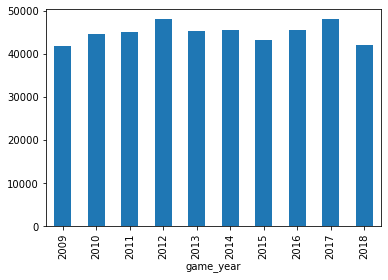

In [96]:
#Plotting the total number of plays per season
smaller_df.groupby('game_year').count()['play_id'].plot.bar()

In [97]:
smaller_df.groupby('play_type').count()['play_id']

play_type
extra_point     10934
field_goal       9777
kickoff         25552
no_play         42431
pass           186677
punt            23914
qb_kneel         3830
qb_spike          690
run            132692
Name: play_id, dtype: int64

<AxesSubplot:xlabel='play_type'>

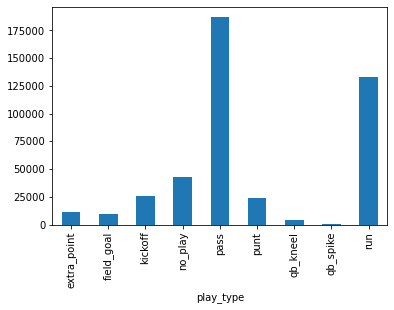

In [98]:
#Plotting the different types of plays
smaller_df.groupby('play_type').count()['play_id'].plot.bar()

In [99]:
#Creating a dataframe with only run or pass plays
run_pass = smaller_df[(smaller_df['play_type'] == 'run') | (smaller_df['play_type'] == 'pass')]

<AxesSubplot:xlabel='qtr'>

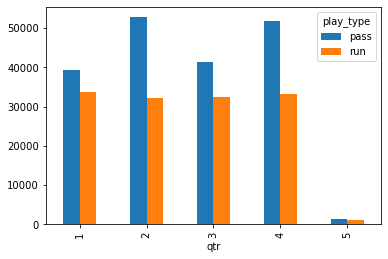

In [100]:
#Playcall by quarter
run_pass.groupby(['qtr', 'play_type',]).count()['play_id'].unstack().plot.bar()

<AxesSubplot:xlabel='down'>

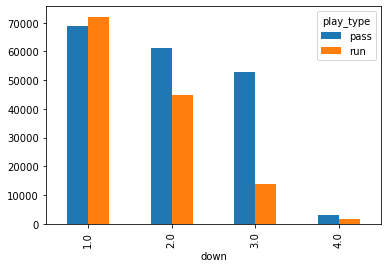

In [101]:
#Playcall by down
run_pass.groupby(['down', 'play_type',]).count()['play_id'].unstack().plot.bar()

In [112]:
#Adding column for if the team with the ball is ahead, behind, or tied
run_pass['lead'] = np.where(run_pass['score_differential']==0, 'tied', 0)
run_pass['lead'] = np.where(run_pass['score_differential']>0, 'ahead', run_pass['lead'])
run_pass['lead'] = np.where(run_pass['score_differential']<0, 'behind', run_pass['lead'])

<ipython-input-112-be6e236cf119>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_pass['lead'] = np.where(run_pass['score_differential']==0, 'tied', 0)
<ipython-input-112-be6e236cf119>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_pass['lead'] = np.where(run_pass['score_differential']>0, 'ahead', run_pass['lead'])
<ipython-input-112-be6e236cf119>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [113]:
#Checking to make sure values updated
run_pass.groupby('lead').count()['play_id']

lead
ahead     110034
behind    149194
tied       59440
Name: play_id, dtype: int64

<AxesSubplot:xlabel='lead'>

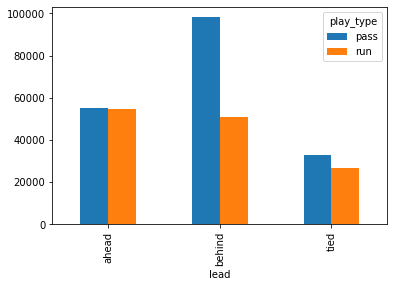

In [114]:
#Playcall by who is leading
run_pass.groupby(['lead', 'play_type',]).count()['play_id'].unstack().plot.bar()

### Data cleaning

In [102]:
run_pass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319369 entries, 1 to 449368
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   play_id                     319369 non-null  int64  
 1   game_id                     319369 non-null  int64  
 2   home_team                   319369 non-null  object 
 3   away_team                   319369 non-null  object 
 4   posteam                     319369 non-null  object 
 5   posteam_type                319369 non-null  object 
 6   defteam                     319369 non-null  object 
 7   side_of_field               319369 non-null  object 
 8   yardline_100                319369 non-null  float64
 9   game_date                   319369 non-null  object 
 10  quarter_seconds_remaining   319369 non-null  float64
 11  half_seconds_remaining      319352 non-null  float64
 12  game_seconds_remaining      319355 non-null  float64
 13  game_half     

Since there are only a few missing values (half_seconds_remaining, game_seconds_remaining, down), it is okay to drop these values without affecting our analysis.

In [103]:
run_pass.dropna(inplace = True)

<ipython-input-103-e05c900ed3d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_pass.dropna(inplace = True)


In [104]:
run_pass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318668 entries, 1 to 449368
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   play_id                     318668 non-null  int64  
 1   game_id                     318668 non-null  int64  
 2   home_team                   318668 non-null  object 
 3   away_team                   318668 non-null  object 
 4   posteam                     318668 non-null  object 
 5   posteam_type                318668 non-null  object 
 6   defteam                     318668 non-null  object 
 7   side_of_field               318668 non-null  object 
 8   yardline_100                318668 non-null  float64
 9   game_date                   318668 non-null  object 
 10  quarter_seconds_remaining   318668 non-null  float64
 11  half_seconds_remaining      318668 non-null  float64
 12  game_seconds_remaining      318668 non-null  float64
 13  game_half     

### Feature engineering